In [1]:
%pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 12.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 8.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Instalação das LIBs necessárias para o projeto

In [2]:
import geopandas as gpd
import matplotlib

In [10]:
path_list = ['BR_Municipios_2022/BR_Municipios_2022.shp', 'BR_Rodovias_2022/Rodovias_estaduais_sre.shp', 'BR_Aeroportos_2022/AEROPORTOS.shp']
dados = [gpd.read_file(path) for path in path_list]

In [13]:
municipios_filter = dados[0][dados[0]['SIGLA_UF'] == 'PR']

In [14]:
municipios_filter

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3912,4100103,Abatiá,PR,228.717,"POLYGON ((-50.31709 -23.35594, -50.32010 -23.3..."
3913,4100202,Adrianópolis,PR,1349.311,"POLYGON ((-48.74044 -24.86835, -48.83801 -24.8..."
3914,4100301,Agudos do Sul,PR,192.261,"POLYGON ((-49.29618 -26.08673, -49.29620 -26.0..."
3915,4100400,Almirante Tamandaré,PR,194.228,"POLYGON ((-49.25401 -25.31913, -49.25402 -25.3..."
3916,4100459,Altamira do Paraná,PR,386.945,"POLYGON ((-52.71774 -24.85776, -52.71840 -24.8..."
...,...,...,...,...,...
4306,4128625,Alto Paraíso,PR,967.772,"POLYGON ((-53.94556 -23.64963, -53.95576 -23.6..."
4307,4128633,Doutor Ulysses,PR,777.482,"POLYGON ((-49.34065 -24.75685, -49.34082 -24.7..."
4308,4128658,Virmond,PR,249.094,"POLYGON ((-52.16911 -25.38702, -52.16953 -25.3..."
4309,4128708,Vitorino,PR,308.218,"POLYGON ((-52.77092 -26.24167, -52.77001 -26.2..."


<Axes: >

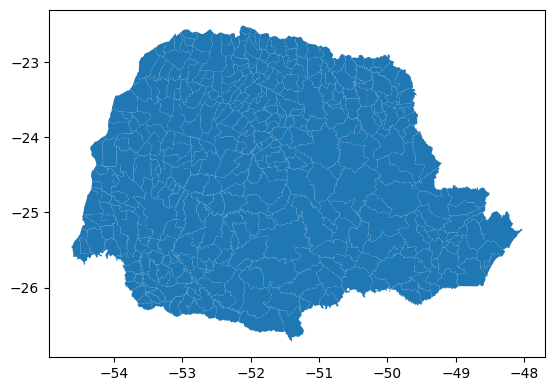

In [15]:
municipios_filter.plot()

In [16]:
rodovias = gpd.overlay(dados[1], municipios_filter, how='intersection')

In [18]:
rodovias.head()

,OBJECTID_1,OBJECTID,ROD_KM_INI,ROD_KM_FIN,ROD_KM_EXT,SNV_ROD_CO,UF_SIGLA,ROD_ADM_NO,ROD_CODIGO,SNV_ROD_SU,...,ROD_FON_DE,br,filtro_lab,Shape_Leng,Shape_STLe,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,735,1158,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,Mapa DER 2006,471,NaN,0.188224,0.188224,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.34756 -25.62747, -53.34771 -25..."
1,7807,11131,0.0,0.0,0.0,S/I,PR,Estadual,PR-592,Pavimentada,...,Mapa DER 2006,592,NaN,0.277124,0.277124,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.49297 -25.54249, -53.49275 -25..."
2,9064,12927,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,Mapa DER 2006,471,NaN,0.114511,0.114511,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.27118 -25.58233, -53.27120 -25..."
3,9275,13248,0.0,0.0,0.0,S/I,PR,Estadual,PR-180,Planejada,...,Mapa DER 2006,180,NaN,0.208281,0.208281,4117255,Nova Prata do Iguaçu,PR,352.565,"MULTILINESTRING ((-53.26927 -25.56739, -53.293..."
4,735,1158,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,Mapa DER 2006,471,NaN,0.188224,0.188224,4123006,Salto do Lontra,PR,312.717,"LINESTRING (-53.33922 -25.69425, -53.33908 -25..."


<Axes: >

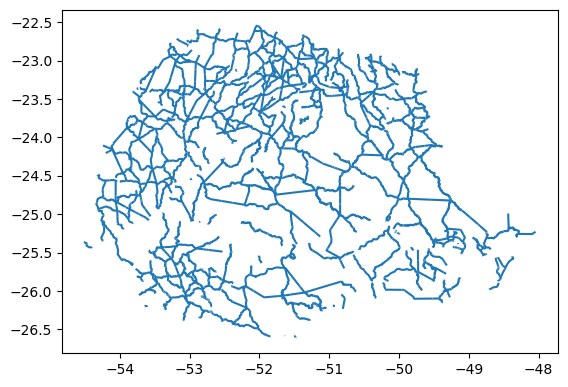

In [17]:
rodovias.plot()

In [22]:
rodovias['extensao_km'] = rodovias['geometry'].to_crs(epsg=5880).length / 1000
rodovias.head()

,OBJECTID_1,OBJECTID,ROD_KM_INI,ROD_KM_FIN,ROD_KM_EXT,SNV_ROD_CO,UF_SIGLA,ROD_ADM_NO,ROD_CODIGO,SNV_ROD_SU,...,filtro_lab,Shape_Leng,Shape_STLe,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,extensao,extensao_km
0,735,1158,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,NaN,0.188224,0.188224,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.34756 -25.62747, -53.34771 -25...","LINESTRING (-53.34756 -25.62747, -53.34771 -25...",8.357737
1,7807,11131,0.0,0.0,0.0,S/I,PR,Estadual,PR-592,Pavimentada,...,NaN,0.277124,0.277124,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.49297 -25.54249, -53.49275 -25...","LINESTRING (-53.49297 -25.54249, -53.49275 -25...",20.878286
2,9064,12927,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,NaN,0.114511,0.114511,4117255,Nova Prata do Iguaçu,PR,352.565,"LINESTRING (-53.27118 -25.58233, -53.27120 -25...","LINESTRING (-53.27118 -25.58233, -53.27120 -25...",10.416482
3,9275,13248,0.0,0.0,0.0,S/I,PR,Estadual,PR-180,Planejada,...,NaN,0.208281,0.208281,4117255,Nova Prata do Iguaçu,PR,352.565,"MULTILINESTRING ((-53.26927 -25.56739, -53.293...","MULTILINESTRING ((-53.26927 -25.56739, -53.293...",9.003946
4,735,1158,0.0,0.0,0.0,S/I,PR,Estadual,PR-471,Pavimentada,...,NaN,0.188224,0.188224,4123006,Salto do Lontra,PR,312.717,"LINESTRING (-53.33922 -25.69425, -53.33908 -25...","LINESTRING (-53.33922 -25.69425, -53.33908 -25...",12.048505


In [39]:
aeroportos = gpd.sjoin(dados[2], municipios_filter, how='inner', op='within')
aeroportos.head()

/home/jose/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID,CODIGO,AEROPORTO,AEROPORTO_,LAT,LONG,CLASSIFICA,CARGA2000,PASSAGEIRO,CARGA2001,...,PASSAGE_17,CARGA2018,PASSAGE_18,MAPA_OSM,geometry,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
10,11,SBCT,CURITIBA,CURITIBA,25° 31' 54'' S,49° 10' 34'' W,Não Concedido,7755965.0,1247246.0,10691588.0,...,3329709.0,12665291.0,3172460.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-49.17611 -25.53167),4261,4125506,São José dos Pinhais,PR,946.435
20,21,SBFI,FOZ DO IGUAÇU,FOZ DO IGUAÇU,25° 36' 1'' S,54° 29' 6'' W,Não Concedido,207633.0,235739.0,182275.0,...,1085333.0,298945.0,1171011.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-54.48500 -25.60028),4030,4108304,Foz do Iguaçu,PR,609.192
30,31,SBLO,LONDRINA,LONDRINA,23° 19' 49'' S,51° 8' 12'' W,Não Concedido,853068.0,206530.0,1562069.0,...,435090.0,874028.0,491496.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-51.13667 -23.33028),4102,4113700,Londrina,PR,1652.569
32,33,SBMG,MARINGÁ,MARINGÁ,23° 28' 46'' S,52° 0' 44'' W,Não Concedido,145557.0,63710.0,55303.0,...,330885.0,638266.0,321240.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-52.01222 -23.47944),4120,4115200,Maringá,PR,487.012
51,52,SBCA,CASCAVEL,CASCAVEL,25° 0' 8'' S,53° 30' 7'' W,Não Concedido,25970.0,21828.0,29098.0,...,78898.0,92306.0,71638.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-53.50194 -25.00222),3980,4104808,Cascavel,PR,2091.199
106,107,SSZW,PONTA GROSSA,PONTA GROSSA,25° 11' 4'' S,50° 8' 38'' W,Não Concedido,0.0,0.0,0.0,...,8092.0,1943.0,7988.0,"<iframe width=""425"" height=""350"" frameborder=""...",POINT (-50.14389 -25.18444),4186,4119905,Ponta Grossa,PR,2054.732


In [ ]:
aeroportos.value_counts

<Axes: >

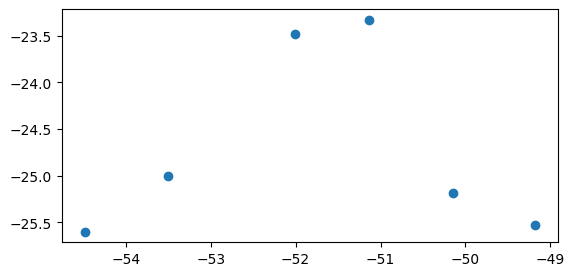

In [37]:
aeroportos.plot()